In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv('datasets_180_408_data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
del data['Unnamed: 32']

In [6]:
X=data.iloc[:,2:].values
y=data.iloc[:,1].values

#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)








In [7]:
#import Keras

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [11]:
classifier=Sequential()

In [16]:
#Adding the input layer and the first hidden layer

classifier.add(Dense(16, activation='relu', input_dim=30,kernel_initializer="uniform"))
classifier.add(Dropout(0.1))


In [17]:
#Adding the second layer

classifier.add(Dense(16, activation='relu', input_dim=30,kernel_initializer="uniform"))
classifier.add(Dropout(0.1))


In [18]:
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))


In [20]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [22]:
#fitting the ANN to training set
classifier.fit(X_train,y_train,batch_size=100,epochs=150)


Epoch 1/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5605
Epoch 2/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.6328
Epoch 3/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6484
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6875
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.7812
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.8652
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.9121
Epoch 8/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.9355
Epoch 9/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.9453
Epoch 10/150
6/6 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.9473
Epoch 11/150
6/6 [===========

In [33]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)


In [34]:
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [35]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [36]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 94.73684210526315%


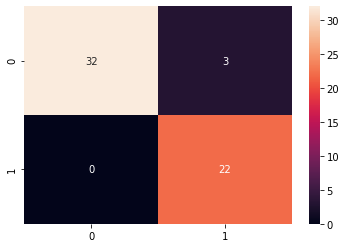

In [38]:
sns.heatmap(cm,annot=True)